Machine Learning - Problem Set 2

1. (ISL: Chapter 4, Question 5)1 We now examine the differences between LDA and QDA.
    a. If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set? Briefly explain.

We would expect the QDA to perform better on the training set because it would have the flexibility to account for the errors in the training set observations. We would expect the LDA to perform better for the test data set because it would be able to match the shape of the underlying function and does not have the same overfitting concerns as the QDA.

    b. If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set? Briefly explain.

We would expect the QDA to perform better on both sets because it can account for the non-linearity in the decision boundary. This allows the best fit line in the training set to most closely match the data and the best fit line that minimizes error in the test data set to come much closer to the true decision boundary. 

    c. In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

We expect QDA to become more accurate relative to LDA because the larger the sample size the more accurate the covariances calculated from the training data will be and thus the more accurate the QDA model will be. 

    d. True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

False, the QDA will start to model some of the error in the training data so the estimated decision boundary will have some nonlinearities even for a linear decision boundary. 


2. (ISL: Chapter 4, Question 6) Suppose we collect data for a group of students in a statistics class with variables X1 =hours studied, X2 =undergrad GPA, and Y =receive an A. We fit a logistic regression and produce estimated coefficient, β0 = −6, β1 = 0.05, β2 = 1.
    a. Predict the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.

Y-hat = exp(B0 + B1*X1 + B2*X2) / (1 + exp(B0 + B1*X1 + B2*X2))

Y-hat = exp(-6 + 0.05*40 + 1*3.5) / (1 + exp(-6 + 0.05*40 + 1*3.5))

Y-hat = 0.377


    b. How many hours would the student in (the previous question) need to study to have a 50% chance of getting an A in the class?

.5 = exp(-6 + 0.05*X1 + 1*3.5) / (1 + exp(-6 + 0.05*X1 + 1*3.5))

X1 = 50

3. (ISL: Chapter 4, Question 7) Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X¯ = 10, while the mean for those that didn’t was X¯ = 0. In addition, the variance of X for these two sets of companies was σˆ 2 = 36. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

P(dividend | x = 4) = ln(.8/.2) - (10^2 / (2 *36)) + (10 / 36)*4

P(dividend | x = 4) = .752

4. (ISL: Chapter 4, Question 14, parts (a) - (g)) In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [42]:
##########################
# Imports
##########################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

##########################
# Load Auto data
##########################
os.chdir(r"C:\Users\dtkos\OneDrive\Documents\Grad School\Y2Q1\Machine Learning")
auto = pd.read_csv("Data-Auto.csv")
print(auto.shape)
display(auto.head())

(392, 10)


,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


    a. Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the .median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment.

In [43]:
##########################
# Create mpg01
##########################
auto["mpg_median"] = auto["mpg"].median()
auto["mpg01"] = (auto["mpg"] > auto["mpg_median"]).astype(int)
print(auto["mpg01"].value_counts())

mpg01
0    196
1    196
Name: count, dtype: int64


    b. Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

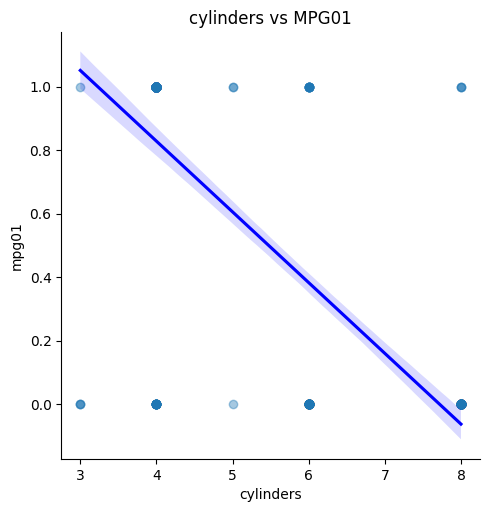

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


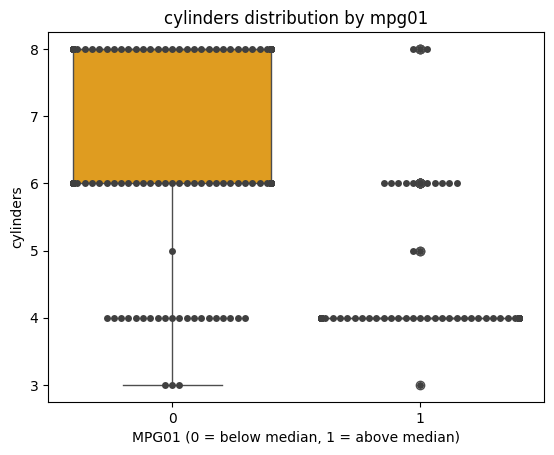

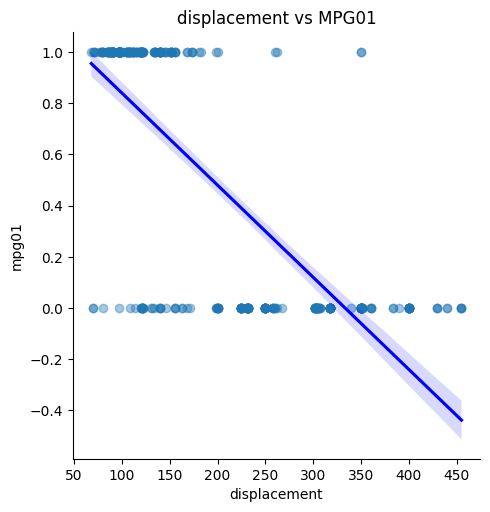

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


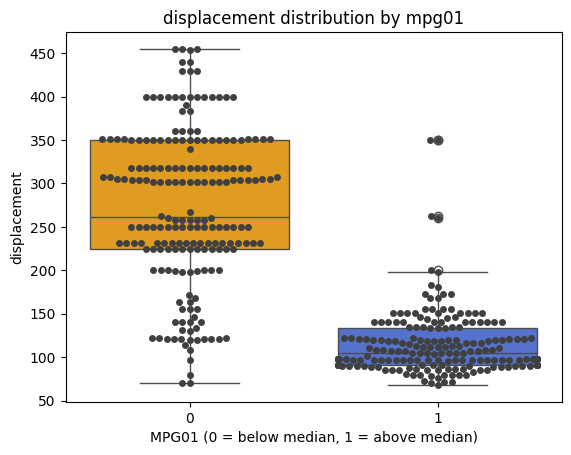

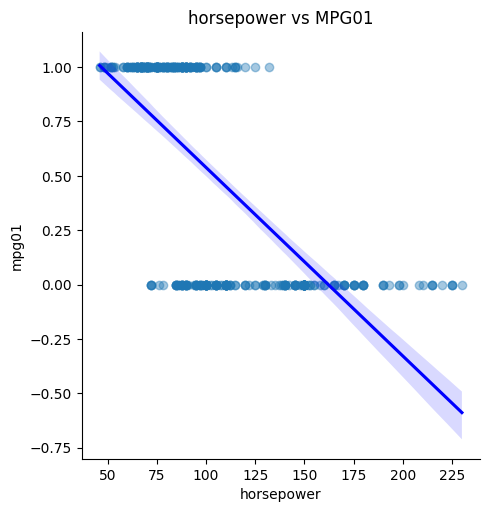

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])


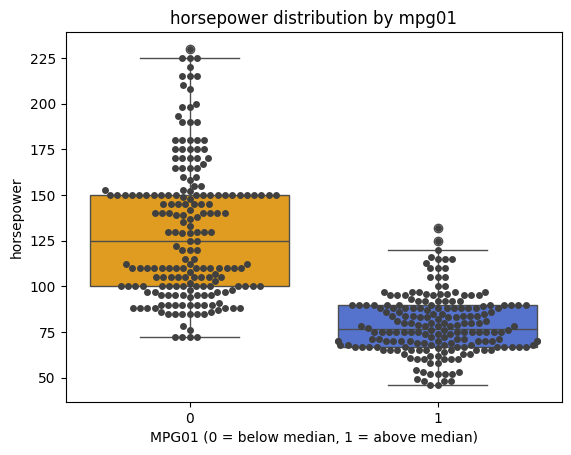

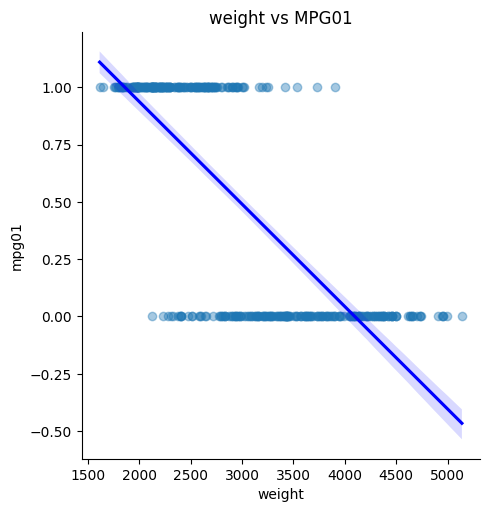

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])


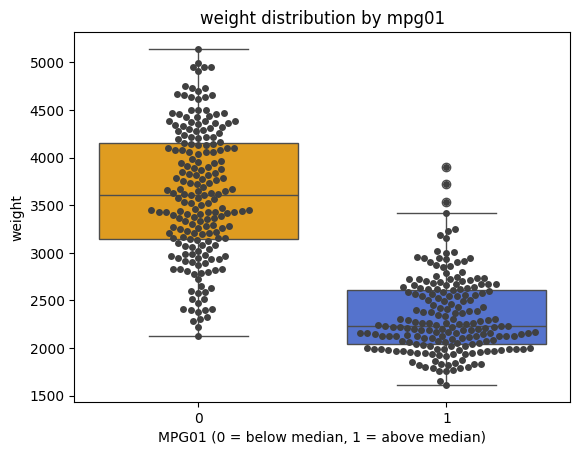

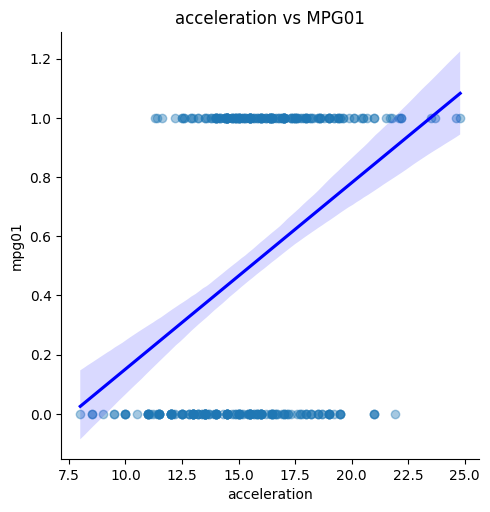

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])


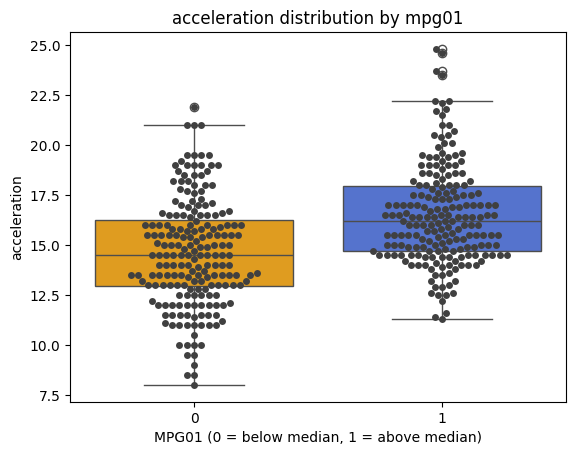

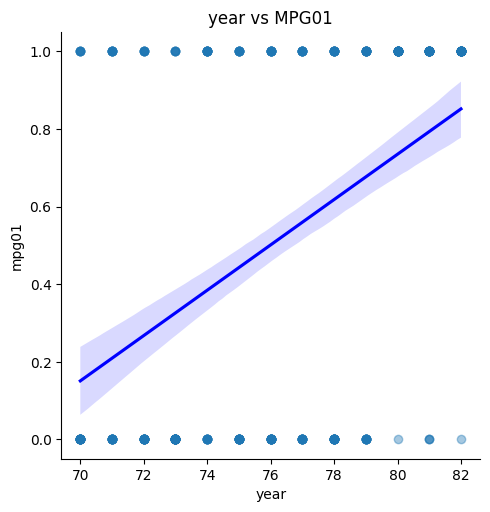

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])


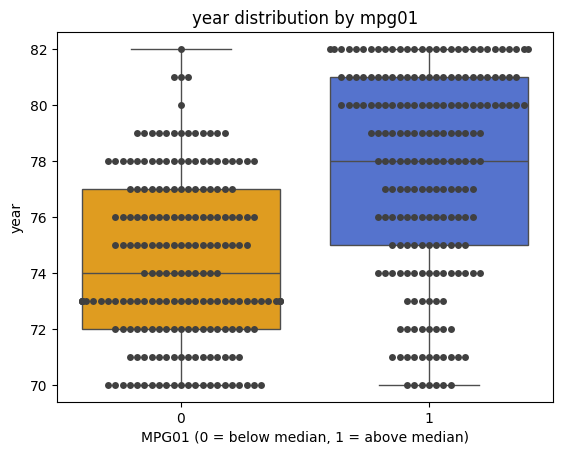

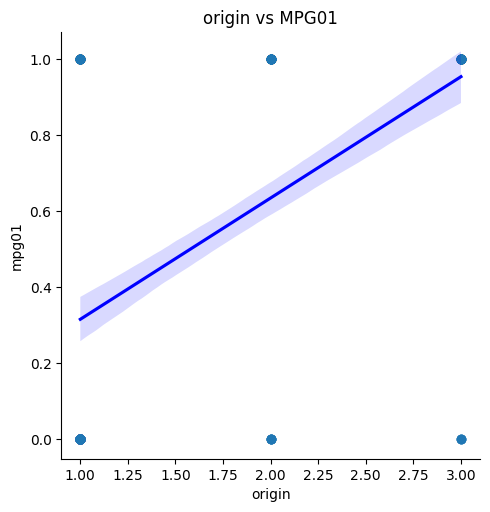

C:\Users\dtkos\AppData\Local\Temp\ipykernel_4344\3885043364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dtkos\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


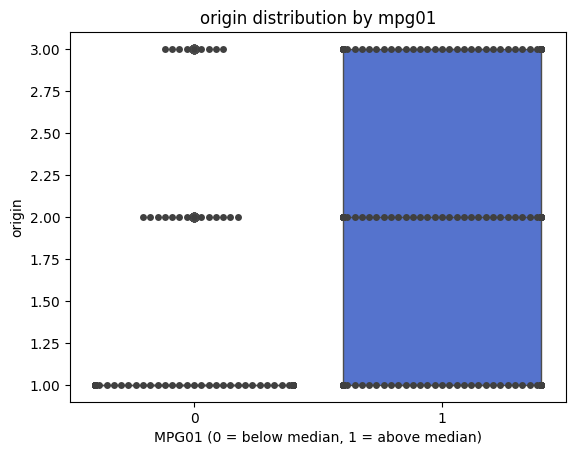

In [44]:
##########################
# Exploratory plots
##########################
predictor_vars = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]

for var in predictor_vars:
    sns.lmplot(x=var, y="mpg01", data=auto,
               scatter_kws={"alpha": 0.4},
               line_kws={"color": "blue"})
    plt.title(f"{var} vs MPG01")
    plt.show()

    ax = sns.boxplot(x="mpg01", y=var, data=auto, palette=["orange", "royalblue"])
    sns.swarmplot(x="mpg01", y=var, data=auto, color=".25")
    ax.set_xlabel("MPG01 (0 = below median, 1 = above median)")
    ax.set_ylabel(var)
    plt.title(f"{var} distribution by mpg01")
    plt.show()

Displacement, horsepower, weight, and cylinders show strong separation between vehicles with above-median and below-median mpg, with cars achieving lower mpg generally being heavier, more powerful, with more cylinders, and more displacement. The year variable also shows a clear trend, as newer vehicles tend to have higher mpg, albeit not as strong of a relationship as the other variables. Based on these exploratory plots, displacement, horsepower, weight, cylinders, and year appear to be the most informative predictors for mpg01.


In [45]:
##########################
# Select predictive features
##########################
X = auto[['displacement', 'horsepower', 'weight', 'cylinders', 'year']]
y = auto["mpg01"]

    c. Split the data into a training set and a test set. Please use a 50/50 training/test split (50% of the observations in the training set and 50% in the test set). To avoid confusion among partners and facilitate grading, you should set random_state=22 when splitting the data.

In [46]:
##########################
# 50/50 Train/Test Split
##########################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=22
)

##########################
# Leakage Check via OLS
##########################
X_train_dummy = X_train.copy()
X_test_dummy = X_test.copy()

X_train_dummy.insert(0, 'test', 0)
X_test_dummy.insert(0, 'test', 1)

X_full = pd.concat([X_test_dummy, X_train_dummy], axis=0)

result = smf.ols('test ~ displacement + horsepower + weight + cylinders + year', data=X_full).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   test   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5071
Date:                Thu, 30 Oct 2025   Prob (F-statistic):              0.771
Time:                        19:11:19   Log-Likelihood:                -283.23
No. Observations:                 392   AIC:                             578.5
Df Residuals:                     386   BIC:                             602.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0099      0.625     -0.016   

None of the variables are statistically significant so we do not observe any leakage between the training and testing data.

    d. Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in Question (4b). What is the test error of the model obtained?

The LDA test error of the LDA model is
8.67%


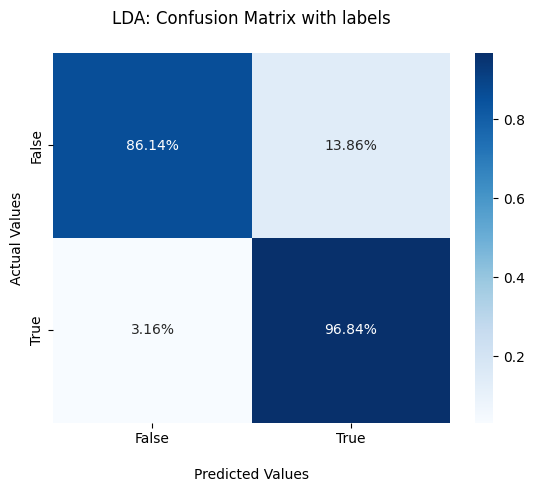

In [47]:
accuracies = {}

##########################
# LDA
##########################
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_l = lda_model.predict(X_test)
accuracies['LDA'] = accuracy_score(y_test, y_pred_l)
print("The LDA test error of the LDA model is")
print(f"{(1 - accuracies['LDA']):.2%}")


ax = sns.heatmap(confusion_matrix(y_test, y_pred_l, normalize='true'),
                  annot=True, fmt='.2%', cmap='Blues')
ax.set_title('LDA: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

    d. Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in Question (4b). What is the test error of the model obtained?

The error rate of the QDA model is:
10.71%


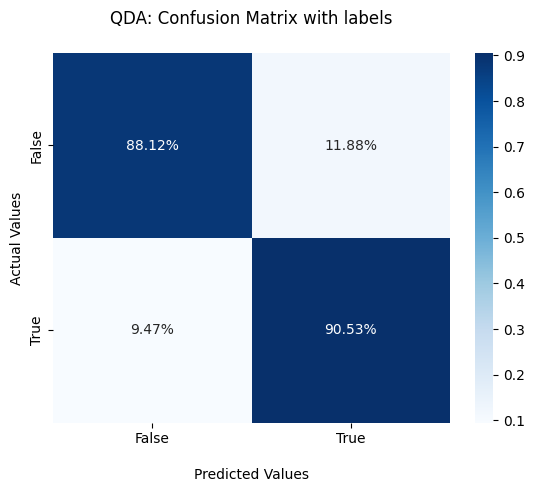

In [48]:
##########################
# QDA
##########################
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_q = qda_model.predict(X_test)
accuracies['QDA'] = accuracy_score(y_test, y_pred_q)
print("The error rate of the QDA model is:")
print(f"{(1 - accuracies['QDA']):.2%}")

ax = sns.heatmap(confusion_matrix(y_test, y_pred_q, normalize='true'),
                  annot=True, fmt='.2%', cmap='Blues')
ax.set_title('QDA: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

    f. Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in Question (4b). What is the test error of the model obtained?

The error rate of the Logistic model is:
8.16%


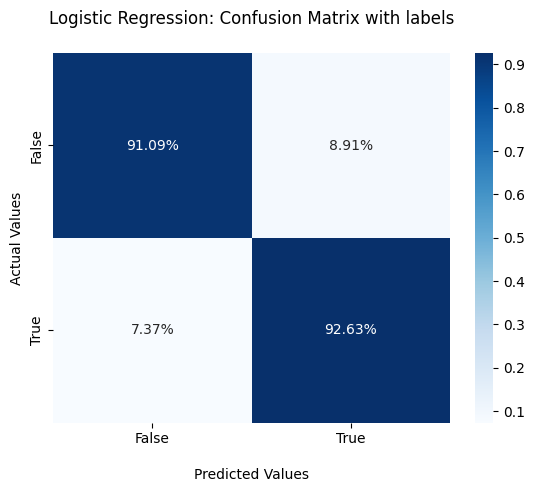

In [49]:
##########################
# Logistic Regression
##########################
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracies['Logistic'] = accuracy_score(y_test, y_pred_log)
print("The error rate of the Logistic model is:")
print(f"{(1 - accuracies['Logistic']):.2%}")

ax = sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true'),
                  annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Logistic Regression: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

    g. Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in Question (4b). What is the test error of the model obtained?

The error rate of the Naive Bayes model is:
10.71%


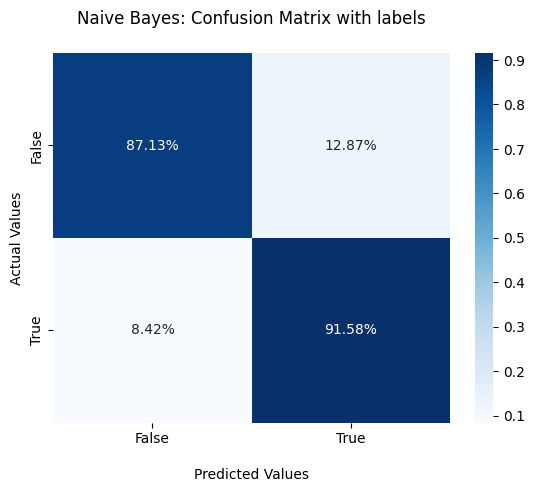

In [50]:
##########################
# Naive Bayes
##########################
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracies['NB'] = accuracy_score(y_test, y_pred_nb)
print("The error rate of the Naive Bayes model is:")
print(f"{(1 - accuracies['NB']):.2%}")

ax = sns.heatmap(confusion_matrix(y_test, y_pred_nb, normalize='true'),
                  annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Naive Bayes: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

    h. Which model (LDA, QDA, logit, or naive Bayes) do you prefer? Why should you be concerned about selecting a model in this way?




In [51]:
##########################
# Print Auto Data Results
##########################
print("\n=== Model Test Accuracies (Auto Data) ===")
for model, acc in accuracies.items():
    print(f"{model}: {acc*100:.2f}%")


=== Model Test Accuracies (Auto Data) ===
LDA: 91.33%
QDA: 89.29%
Logistic: 91.84%
NB: 89.29%


Based solely on the error rate, I would prefer the Logistic regression. We should be concerned about selecting a model this way because it doesn’t take into account any heterogeneity in the cost of Type I vs Type II errors. For example, if a regulator were using this model to determine which cars met fuel efficiency standards it might be more costly for that regulator to misclassify a car that isn’t efficient enough as above the median than to misclassify a car that is efficient enough as below the median if the regulator’s goal is to reduce pollution. In the former case, a polluting car is kept put on the road, while in the latter a more efficient, but still polluting car is taken off the road. We must consider the cost associated with each type of error to determine the best model that minimizes costs, not just minimize total errors.

5. (ISL: Chapter 5, Question 5) In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [52]:
################################################################
# CHAPTER 5 VALIDATION SET DEFAULT DATA
################################################################

default = pd.read_csv("Data-Default.csv")
print(default.shape)
display(default.head())

X = default[['income', 'balance']]
y = default['default']

(10000, 4)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


    a. Fit a logistic regression model that uses income and balance to predict default. Report the parameter estimates from your fit.

In [53]:
##########################
# Fit base logistic regression
##########################
base_log = LogisticRegression(max_iter=500)
base_log.fit(X, y)

coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": base_log.coef_[0]
})

print("Intercept:", base_log.intercept_[0])
print(coef_table)

Intercept: -11.540467918641374
   Feature  Coefficient
0   income     0.000021
1  balance     0.005647


    b. Using the validation set approach, estimate the test error of this model. In order to do this, you should perform the following steps:
        i. Split the sample set into a training set and a validation set. In this question, please use a 70/30 training/validation set split. Please set random_state=42 when splitting the data.


In [54]:
##########################
# 70/30 Split
##########################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Sanity check
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

#Confirming train and test sets are well-balanced
X_train_dummy = X_train.copy()
X_test_dummy = X_test.copy()

X_train_dummy.insert(0, 'test', 0)
X_test_dummy.insert(0, 'test', 1)

X_full = pd.concat([X_test_dummy, X_train_dummy], axis = 0)

display(X_full)
print(X_full['test'].value_counts())

result = smf.ols(
    'test ~ income + balance',
    data = X_full
).fit()
print(result.summary())


,income,balance
9069,41239.020510,0.000000
2603,37073.192381,961.999353
7738,19039.168273,655.611221
1579,27690.113535,864.047198
5058,57561.411261,1306.832034


,income,balance
6252,31507.089277,1435.662933
4684,42139.070269,771.789347
1731,21809.218509,0.000000
4742,32803.832648,113.571264
4521,49903.597081,1358.132472


9069    No
2603    No
7738    No
1579    No
5058    No
Name: default, dtype: object

6252    No
4684    No
1731    No
4742    No
4521    No
Name: default, dtype: object

,test,income,balance
6252,1,31507.089277,1435.662933
4684,1,42139.070269,771.789347
1731,1,21809.218509,0.000000
4742,1,32803.832648,113.571264
4521,1,49903.597081,1358.132472
...,...,...,...
5734,0,33541.046380,865.697004
5191,0,20500.212632,493.629546
5390,0,26984.256287,722.029162
860,0,21083.004510,163.939823


test
0    7000
1    3000
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                   test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5678
Date:                Thu, 30 Oct 2025   Prob (F-statistic):              0.567
Time:                        19:11:21   Log-Likelihood:                -6385.6
No. Observations:               10000   AIC:                         1.278e+04
Df Residuals:                    9997   BIC:                         1.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

        ii. Fit a multiple logistic regression model using only the training observations.

In [55]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


        iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [56]:
# Predict the validation set
y_pred_log = log_reg.predict(X_test)
y_pred_log[:5]


array(['No', 'No', 'No', 'No', 'No'], dtype=object)

        iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [57]:
acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f"\nValidation Error Rate (random_state=42): {(1 - acc)*100:.2f}%")


Validation Error Rate (random_state=42): 2.67%


    c. Repeat the process in Question (5b) three times, using three different splits of the observations into a training set and a validation set. In this question, keep the 70/30 training/validation set split. Please set random_states of 2, 6, and 9 to obtain the three different splits of the observations. Comment on the results obtained.

In [58]:
##########################
# Repeat for random_states 2, 6, 9
##########################
accuracies_q5 = {}

random_states = [2, 6, 9]

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=rs
    )

    log_reg = LogisticRegression(max_iter=500)
    log_reg.fit(X_train, y_train)

    acc = accuracy_score(y_test, log_reg.predict(X_test))
    accuracies_q5[f"logit_{rs}"] = acc

print("\n=== Validation Error Rate Across Splits ===")
for k, v in accuracies_q5.items():
    print(f"{k}: {(1 - v)*100:.2f}%")


=== Validation Error Rate Across Splits ===
logit_2: 2.37%
logit_6: 2.47%
logit_9: 2.17%


    d. Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Please use a 70/30 training/validation set split, and set random_state=42 when splitting the data. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [59]:
##########################
# Add student dummy variable
##########################
default["student"] = default["student"].map({"Yes": 1.0, "No": 0.0})
X2 = default[['income', 'balance', 'student']]

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=42
)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

acc_student = accuracy_score(y_test, log_reg.predict(X_test))
print(f"\nValidation Error Rate w/ student: {(1 - acc_student)*100:.2f}%")


Validation Error Rate w/ student: 2.67%


Adding in the student variable does not lower the error rate.